In [365]:
import numpy as np
import pandas as pd
import sklearn
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [366]:
os.chdir('/Users/dhanunjaikumar/Downloads')

In [367]:
train=pd.read_csv('train_ctrUa4K.csv')

In [368]:
test =pd.read_csv('test_lAUu6dG.csv')

In [369]:
train['source']= 'train'
test['source'] = 'test'

In [370]:
train.shape

(614, 14)

In [371]:
all_df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
source                 0
Loan_Status          367
Depend__1              0
Depend__2              0
Depend__3+             0
Depend__Other          0
dtype: int64

In [372]:
all_df.nunique()

Loan_ID              978
Gender               978
Married                2
Education              2
Self_Employed          2
ApplicantIncome      749
CoapplicantIncome    437
LoanAmount           232
Loan_Amount_Term       4
Credit_History         3
Property_Area          3
source                 2
Loan_Status            2
Depend__1              2
Depend__2              2
Depend__3+             2
Depend__Other          2
dtype: int64

In [373]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [374]:
train.loc[train.Married.isnull(),:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,train
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,train
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y,train


In [375]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [376]:
pd.crosstab(train.Gender,train.Education,normalize=0)

Education,Graduate,Not Graduate
Gender,,
Female,0.821429,0.178571
Male,0.768916,0.231084


In [377]:
corr= train.corr()

<AxesSubplot:>

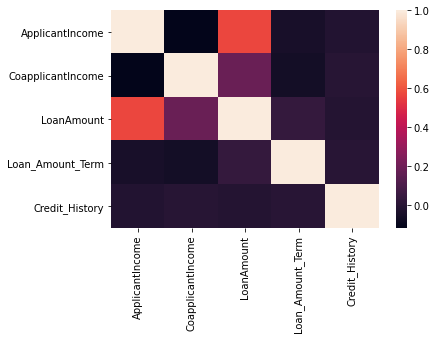

In [378]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [379]:
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [380]:
all_df= pd.concat([test,train],axis=0)

In [381]:
all_df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,source,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,test,NaN


In [382]:
all_df.loc[all_df.Married.isnull(),:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,source,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,train,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,train,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,train,Y


In [383]:
all_df=all_df.loc[all_df.Married.notnull(),:]

In [384]:
all_df.isnull().sum()

Loan_ID                0
Gender                24
Married                0
Dependents            22
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            26
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
source                 0
Loan_Status          367
dtype: int64

In [385]:
all_df.loc[all_df.Gender.isnull(),:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,source,Loan_Status
22,LP001128,NaN,No,0,Graduate,No,3909,0.0,101.0,360.0,1.0,Urban,test,NaN
51,LP001287,NaN,Yes,3+,Not Graduate,No,3500,833.0,120.0,360.0,1.0,Semiurban,test,NaN
106,LP001563,NaN,No,0,Graduate,No,1596,1760.0,119.0,360.0,0.0,Urban,test,NaN
138,LP001769,NaN,No,NaN,Graduate,No,3333,1250.0,110.0,360.0,1.0,Semiurban,test,NaN
209,LP002165,NaN,No,1,Not Graduate,No,2038,4027.0,100.0,360.0,1.0,Rural,test,NaN
231,LP002298,NaN,No,0,Graduate,Yes,2860,2988.0,138.0,360.0,1.0,Urban,test,NaN
245,LP002355,NaN,Yes,0,Graduate,No,3186,3145.0,150.0,180.0,0.0,Semiurban,test,NaN
279,LP002553,NaN,No,0,Graduate,No,29167,0.0,185.0,360.0,1.0,Semiurban,test,NaN
296,LP002614,NaN,No,0,Graduate,No,6478,0.0,108.0,360.0,1.0,Semiurban,test,NaN
303,LP002657,NaN,Yes,1,Not Graduate,Yes,570,2125.0,68.0,360.0,1.0,Rural,test,NaN


In [386]:
pd.crosstab(all_df.Gender,all_df.Married,normalize=0)

Married,No,Yes
Gender,,
Female,0.685083,0.314917
Male,0.274256,0.725744


In [387]:
pd.crosstab(all_df.Gender,all_df.Dependents,normalize=0)

Dependents,0,1,2,3+
Gender,,,,
Female,0.694915,0.180791,0.073446,0.050847
Male,0.539683,0.165344,0.191799,0.103175


In [388]:
pd.crosstab(all_df.Gender,all_df.Credit_History,normalize=0)

Credit_History,0.0,1.0
Gender,,
Female,0.182927,0.817073
Male,0.158708,0.841292


In [389]:
all_df.Credit_History 

0      1.0
1      1.0
2      1.0
3      NaN
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 978, dtype: float64

In [390]:
all_df.Gender=np.where((all_df.Gender.isnull()) & (all_df.Dependents.isin(['2','3+'])),"Male",all_df.Gender)
all_df.Gender.fillna('Other',inplace=True)
all_df.Dependents=np.where(all_df.Dependents.isnull(),'Other',all_df.Dependents)
all_df.Self_Employed = np.where(all_df.Self_Employed.isnull(),'May be',all_df.Self_Employed)  
all_df.LoanAmount.fillna(all_df.LoanAmount.median(),inplace=True)
all_df.Loan_Amount_Term = np.where((all_df.Loan_Amount_Term > 0) & (all_df.Loan_Amount_Term <= 124) ,1,
                                np.where((all_df.Loan_Amount_Term > 124) & (all_df.Loan_Amount_Term < 360),2,
                                  np.where(all_df.Loan_Amount_Term == 360 , 3,4)))                               
all_df.Loan_Amount_Term.fillna('Other',inplace=True) 
all_df.Credit_History.fillna(2.0,inplace=True)                                

In [391]:
pd.crosstab(all_df.Gender,all_df.Self_Employed,normalize=0)

Self_Employed,May be,No,Yes
Gender,,,
Female,0.060773,0.834254,0.104972
Male,0.056483,0.821566,0.121951
Other,0.000000,0.722222,0.277778


In [392]:
pd.crosstab(all_df.Credit_History,all_df.Property_Area)


Property_Area,Rural,Semiurban,Urban
Credit_History,,,
0.0,48,51,49
1.0,220,269,262
2.0,22,27,30


In [393]:
pd.crosstab(all_df.Loan_Amount_Term,all_df.Property_Area,normalize=0)

Property_Area,Rural,Semiurban,Urban
Loan_Amount_Term,,,
1,0.200000,0.350000,0.450000
2,0.287234,0.297872,0.414894
3,0.302920,0.364964,0.332117
4,0.238095,0.285714,0.476190


In [394]:
pd.crosstab(all_df.Gender,all_df.Dependents)

Dependents,0,1,2,3+,Other
Gender,,,,,
Female,123,32,13,9,4
Male,408,125,147,82,17
Other,14,3,0,0,1


In [395]:
pd.crosstab(all_df.Gender,all_df.Dependents,normalize=0)

Dependents,0,1,2,3+,Other
Gender,,,,,
Female,0.679558,0.176796,0.071823,0.049724,0.022099
Male,0.523748,0.160462,0.188703,0.105263,0.021823
Other,0.777778,0.166667,0.000000,0.000000,0.055556


In [396]:
all_df.Self_Employed.unique()

array(['No', 'Yes', 'May be'], dtype=object)

In [397]:
all_df.Married = np.where(all_df.Married=='Yes',1,0)
all_df = pd.concat([all_df,pd.get_dummies(all_df.Gender,prefix='Gender_',drop_first=True)],axis=1).drop('Gender',axis=1)
all_df=pd.concat([all_df,pd.get_dummies(all_df.Dependents,prefix='Depend_',drop_first=True)],axis=1).drop('Dependents',axis=1)
all_df.Education =np.where(all_df.Education=='Graduate',1,0)
all_df = pd.concat([all_df,all_df.Self_Employed,pd.get_dummies(all_df.Self_Employed,prefix='Sf_',drop_first=True)],axis=1).drop('Self_Employed',axis=1)
all_df.Property_Area = np.where(all_df.Property_Area=='Urban',1,np.where(all_df.Property_Area=='Semiurban',2,3))



<AxesSubplot:>

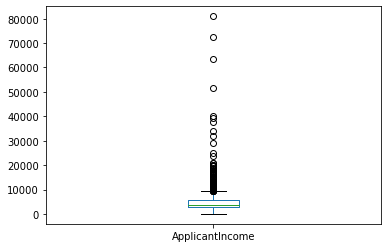

In [398]:
all_df.ApplicantIncome.plot(kind='box')

In [399]:
o1=np.mean(all_df.ApplicantIncome) -3*(all_df.ApplicantIncome).std()
o2=np.mean(all_df.ApplicantIncome) +3*(all_df.ApplicantIncome).std()

In [400]:
print(all_df.loc[all_df.ApplicantIncome < o1,:].shape)
all_df.loc[all_df.ApplicantIncome > o2,:].shape

(0, 19)


(12, 19)

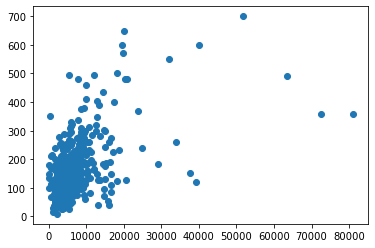

In [401]:
plt.scatter(all_df.ApplicantIncome,all_df.LoanAmount)

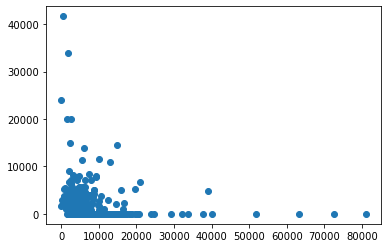

In [402]:
plt.scatter(all_df.ApplicantIncome,all_df.CoapplicantIncome)

In [403]:
all_df.loc[all_df.ApplicantIncome < all_df.CoapplicantIncome,'Loan_Status'].value_counts()

Y    46
N    26
Name: Loan_Status, dtype: int64

In [404]:
all_df.loc[all_df.ApplicantIncome >= all_df.CoapplicantIncome,'Loan_Status'].value_counts()

Y    373
N    166
Name: Loan_Status, dtype: int64

In [405]:
train=all_df.loc[all_df.source=='train']
test= all_df.loc[all_df.source=='test']

In [406]:
train['Loan_Status']=np.where(train.Loan_Status=='Y',1,0)

<ipython-input-406-59bd495fd99f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Loan_Status']=np.where(train.Loan_Status=='Y',1,0)


In [407]:
Model_train, Model_test=model_selection.train_test_split(train,test_size=0.2, train_size=0.8, random_state=99, shuffle=True, stratify=None)

In [408]:
Model_train

,Loan_ID,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,source,Loan_Status,Gender__Male,Gender__Other,Depend__1,Depend__2,Depend__3+,Depend__Other,Sf__No,Sf__Yes
401,LP002296,0,0,2755,0.0,65.0,2,1.0,3,train,0,1,0,0,0,0,0,1,0
114,LP001398,0,1,5050,0.0,118.0,3,1.0,2,train,1,1,0,0,0,0,0,0,0
324,LP002065,1,1,15000,0.0,300.0,3,1.0,3,train,1,1,0,0,0,1,0,1,0
569,LP002841,1,1,3166,2064.0,104.0,3,0.0,1,train,0,1,0,0,0,0,0,1,0
571,LP002847,1,1,5116,1451.0,165.0,3,0.0,1,train,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,LP001671,1,1,3416,2816.0,113.0,3,2.0,2,train,1,0,0,0,0,0,0,1,0
68,LP001238,1,0,7100,0.0,125.0,1,1.0,1,train,1,1,0,0,0,1,0,0,1
169,LP001580,1,1,8000,0.0,200.0,3,1.0,2,train,1,1,0,0,1,0,0,1,0
186,LP001641,1,1,2178,0.0,66.0,2,0.0,3,train,0,1,0,1,0,0,0,0,1


In [193]:
from sklearn import model_selection

In [199]:
Rf=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [201]:
Model_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,source,Loan_Status
401,LP002296,Male,No,0,Not Graduate,No,2755,0.0,65.0,2,1.0,Rural,train,0
114,LP001398,Male,No,0,Graduate,2,5050,0.0,118.0,3,1.0,Semiurban,train,1
324,LP002065,Male,Yes,3+,Graduate,No,15000,0.0,300.0,3,1.0,Rural,train,1
569,LP002841,Male,Yes,0,Graduate,No,3166,2064.0,104.0,3,0.0,Urban,train,0
571,LP002847,Male,Yes,Other,Graduate,No,5116,1451.0,165.0,3,0.0,Urban,train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,LP001671,Female,Yes,0,Graduate,No,3416,2816.0,113.0,3,2.0,Semiurban,train,1
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,1,1.0,Urban,train,1
169,LP001580,Male,Yes,2,Graduate,No,8000,0.0,200.0,3,1.0,Semiurban,train,1
186,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,2,0.0,Rural,train,0


In [427]:
b=Rf.fit(Model_train.drop(['Loan_ID','source','Loan_Status'],axis=1),Model_train.Loan_Status)

In [430]:
Model_test['predict']=b.predict(Model_test.drop(['Loan_ID','source','Loan_Status'],axis=1))

<ipython-input-430-e42c74145cc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model_test['predict']=b.predict(Model_test.drop(['Loan_ID','source','Loan_Status'],axis=1))


In [431]:
pd.crosstab(Model_test.Loan_Status,Model_test.predict)

predict,0,1
Loan_Status,,
0,23,23
1,1,76


In [432]:
test['predict']=b.predict(test.drop(['Loan_ID','source','Loan_Status'],axis=1))

<ipython-input-432-608a16838ca9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predict']=b.predict(test.drop(['Loan_ID','source','Loan_Status'],axis=1))


In [434]:
submission=test.loc[:,['Loan_ID','predict']]

In [435]:
submission.columns=['Loan_ID','Loan_Status']

In [437]:
submission.to_csv('submission.csv',index=False)